In this notebook, we are going to study the prior and posterior of Gaussian Process

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import GPy as gpy
from IPython.display import display
import pylab as pb

In [2]:
# (python does not typically show plots until you ask it, so this inline call gives more 'natural' behavior)
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.figsize'] = (8,5)

First, we want to draw some samples from the prior of Gaussian Process. We use rbf kernel.

In [3]:
from infpy.gp import GaussianProcess, gp_1D_X_range, gp_plot_samples_from
from pylab import plot, title, figure
from infpy.gp import SquaredExponentialKernel as SE

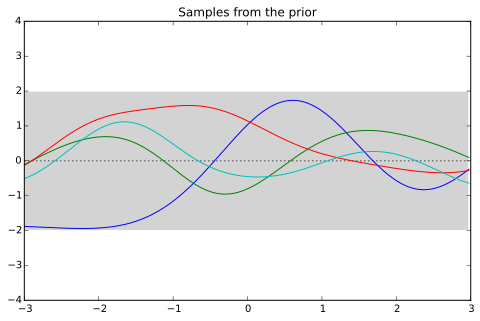

In [10]:
##  define a kernel  ##
kernel = SE([1])

##  we want to sample from -3 to 3, with step 0.025  ##
support = gp_1D_X_range(-3.0,3.0,0.025)

##  next we draw 4 samples from the prior and plot them  ##
figure()
gp = GaussianProcess([], [], kernel) 
gp_plot_samples_from(gp, support, num_samples=4) 
plt.xlim(-3.0,3.0)
plt.ylim(-4,4)
title('Samples from the prior') 

We write Gaussian Process as: $$GP\left( m\left( x \right),k\left( x,x' \right) \right)$$ where m(x) is mean, and k(x,x') is covariance function. In the plot above, each curve is a draw from this Gaussian Process, and each curve is a function. 

Next we are going to draw some data points and change our belief. The function we use is $$y=\sin \left( 2\pi x \right)+2\cos \left( 4\pi x \right)$$ plus some noise

(-4, 4)

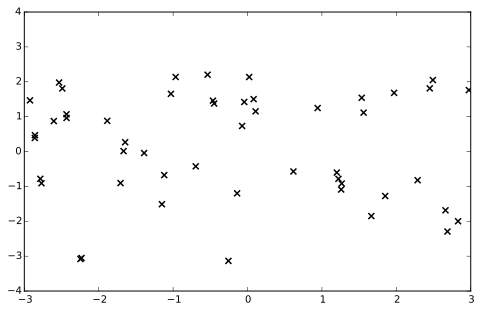

In [20]:
##  draw 50 data points ##
num_points = 50
x = np.random.uniform(-3.,3.,(num_points,1))
y = np.sin(x*2*np.pi) + 2*np.cos(x*4*np.pi) + 0.1*np.random.randn(num_points,1)
##  plot these data points  ##
plt.plot(x,y,'kx',markersize=6,markeredgewidth=1.5)
plt.xlim(-3.0,3.0)
plt.ylim(-4,4)

Next we consider a single point, do GP regression, and change our belief

(-4, 4)

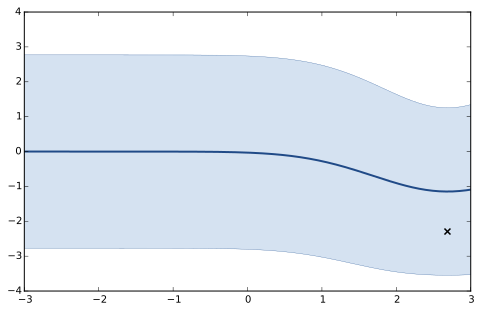

In [22]:
##  do GPregression on a single data point ##
kernel = gpy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = gpy.models.GPRegression(x[0:1],y[0:1],kernel)
m.plot(plot_limits=[-3.0,3.0])
plt.xlim(-3.0,3.0)
plt.ylim(-4,4)

After we draw a data point, we change our prior belief. The variance near the datapoint is smaller because after we draw this data point, we are more confident about the distribution around this datapoint.

Then, we add another data point, and change our belief again

(-4, 4)

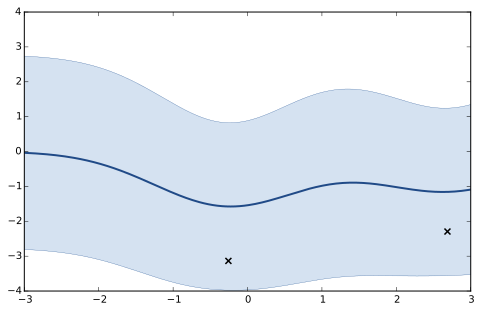

In [23]:
##  add another data point, and again get the posterior ##
m = gpy.models.GPRegression(x[0:2],y[0:2],kernel)
m.plot(plot_limits=[-3.0,3.0])
plt.xlim(-3.0,3.0)
plt.ylim(-4,4)

We can do this 10 times

(-4, 4)

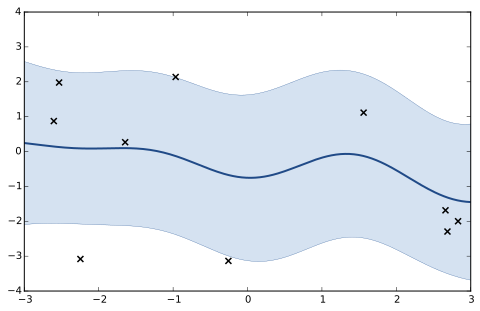

In [24]:
##  draw 10 data points, and get the posterior ##
m = gpy.models.GPRegression(x[0:10],y[0:10],kernel)
m.plot(plot_limits=[-3.0,3.0])
plt.xlim(-3.0,3.0)
plt.ylim(-4,4)

Finally we use all the data points we have, and get the posterior

(-4, 4)

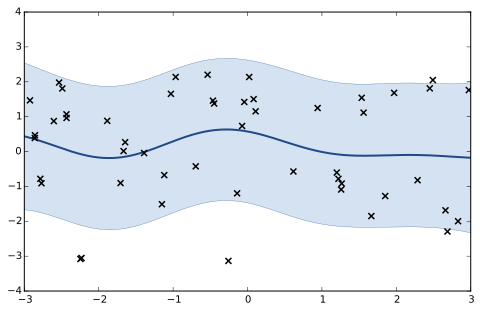

In [25]:
m = gpy.models.GPRegression(x,y,kernel)
m.plot(plot_limits=[-3.0,3.0])
plt.xlim(-3.0,3.0)
plt.ylim(-4,4)

As we draw more and more data points, we become more and more confident around these data points. However, we can also see that the function does not capture data very well, and the confidence interval is a little large. The reason is because of the hyperparameter we choose. Next, we need to choose the hyperparameters. We want to find the parameters such that the likelihood is maximized.

In [26]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 52.7778670411
Optimization restart 2/10, f = 52.7778670411
Optimization restart 3/10, f = 52.777867061
Optimization restart 4/10, f = 56.7522535375
Optimization restart 5/10, f = 91.8308987778
Optimization restart 6/10, f = 91.8308975651
Optimization restart 7/10, f = 91.8308965606
Optimization restart 8/10, f = 91.8308981738
Optimization restart 9/10, f = 91.8308968425
Optimization restart 10/10, f = 91.8308973574


Then, we do regression again using the new parameters.

(-4.0, 4.0)

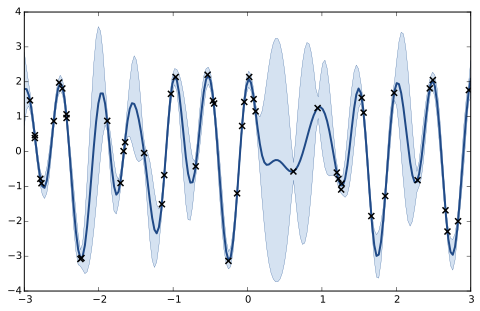

In [27]:
m.plot(plot_limits=[-3.0,3.0])
plt.xlim(-3.0,3.0)
plt.ylim(-4.0,4.0)

We can see that the function fit data better than before.

End.

My question about sample from prior:

 /Users/renxu/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning:covariance is not positive-semidefinite.


(-4, 4)

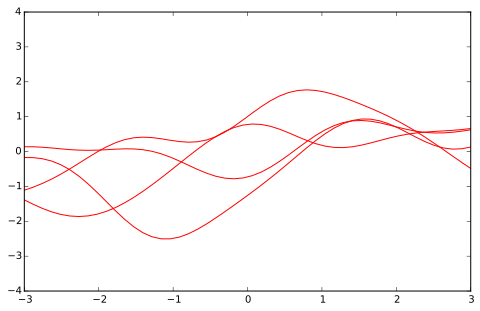

In [8]:
##  first we define a kernel with variance 1.0, and lengthscale 1.0  ##
kernel = gpy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
x = np.linspace(-3.,3.,50)  
x = x[:,None]    ## make X a vector

##  next we are going to draw some samples from the prior  ##
##  find the covariance matrix:
cov_matrix=kernel.K(x)
samples=np.random.multivariate_normal(np.zeros(50),cov_matrix,4)

pb.figure() # open new plotting window, then draw 4 samples from multivariate distribution  ##
for i in range(4):
    pb.plot(sorted(x[:]),samples[i,:],'r')
plt.xlim(-3.0,3.0)
plt.ylim(-4,4)